<a href="https://colab.research.google.com/github/flabarque/Penguin-DataSet---Exploration-Classification/blob/main/Penguin_DataSet_Exploration_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge 2**

## **Exercise 1:**

#### Read, explore and study the dataset. Present an initial analysis of the dispersion measures of its attributes. Also consider loading the `penguins` dataset using the [`seaborn.load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) function.

## **Importing Libraries**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting seaborn style, context and palette
sns.set(style='whitegrid', context='talk', palette='Set1')

**Sources**: https://towardsdatascience.com/6-simple-tips-for-prettier-and-customised-plots-in-seaborn-python-22f02ecc2393

## **Uploading the Dataset into a DataFrame**

### **External Source**

In [3]:
#uploading the Dataset from an external source (i.e., PC hard drive)
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins.csv


In [4]:
#creating a DataFrame from the uploaded dataset file
import io
df = pd.read_csv(io.BytesIO(uploaded['penguins.csv']))

### **Seaborn Database**

In [5]:
#looking for dataset names on Seaborn Database
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
#loading the dataset penguins
penguins = sns.load_dataset('penguins')

## **Exploring the DataFrame**

In [7]:
#calling the DataFrame
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


--> Size. DataFrame with 344 rows and 7 columns.

In [8]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


--> Size. DataFrame with 344 rows and 7 columns.

As you might see, both Datasets are identical. We will use the `df` DataFrame in the further analyses.

## **Showing Descriptive Statistics of the DataFrame**

In [9]:
#looking for basic information, as data type (a.k.a., Dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


--> Data type and missing information. Please, note that except *species* and *island*, all the other features have a lesser non-null count of 342 or 333 (i.e. *sex*) instead of 344, meaning that all have two or 11 missing values, respectively.

In [10]:
#identifiying unique items in categorical features
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

--> The categorical features (Dtype - object) *species* and *island* have three items each.

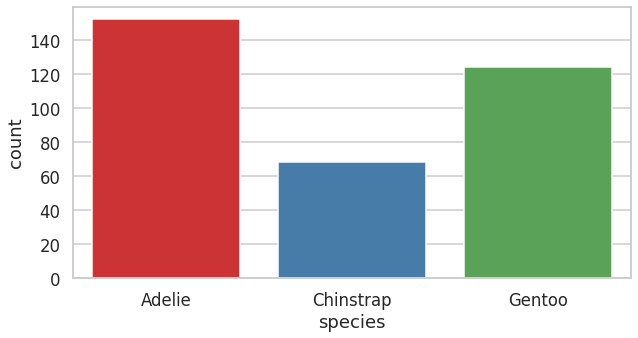

In [12]:
#figure size
plt.figure(figsize=(10,5))
#countplot species
sns.countplot(x=df['species']);

--> Adélie penguin species present the highest number of specimens, followed by Gentoo and Chinstrap penguins species.

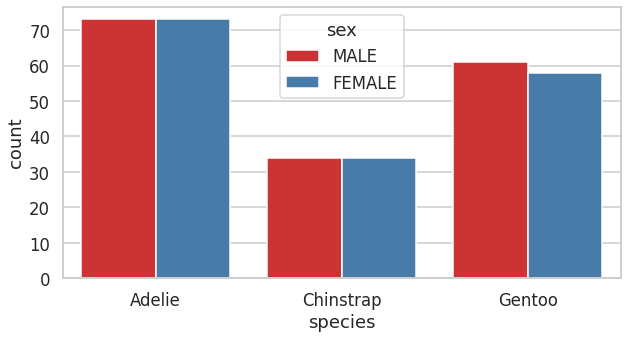

In [13]:
#figure size
plt.figure(figsize=(10,5))
#countplot species per sex
sns.countplot(x=df['species'], hue=df['sex']);

--> Female and male specimens are evenly distributed among penguin species populations. 

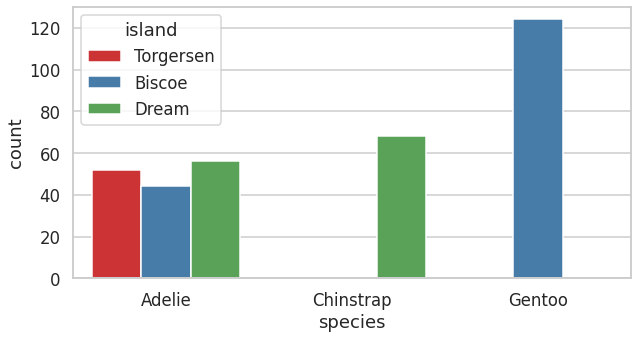

In [14]:
#figure size
plt.figure(figsize=(10,5))
#countplot species per island
sns.countplot(x=df['species'], hue=df['island']);

--> Adélie penguin species live on all the islands, whereas Gentoo penguin species live on Dream island and Chinstrap penguins species on Biscoe island.

## **Treating Missing Values**
Missing values are frequent in any dataset, especially those obtained from real-life scenarios. The likelihood of having missing values increases with the size of the dataset. Having missing values in the dataset can cause errors with some machine learning algorithms. Hopefully, there are several useful functions for detecting, removing, and replacing them in the dataset.

In [15]:
#verifying missing values in each feature of the DataFrame
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

As previosly mentioned, most features have two missing values in the DataFrame, whereas *sex* has 11.

In [16]:
#detecting the specific missing values in the DataFrame
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Now that we detected the missing values, we have two alternatives:

*   Remove those values: If there are many missing values in a column or a row, it is recommendable to remove that column or row entirely. Contrary, if there are few, it is appropriate to remove just those rows with missing values. In our example, we can remove the rows 3 and 339 (see below `df_reduce_nan`). 

*   Replace those values: In our example, it is possible to replace the missing values by the mean or the median values of the category (i.e., *sex*). However, we will use a DataFrame with missing values (see below `df_only_nan`) to predict them using ML algorithms.

In [17]:
#creating a new DataFrame without the rows with many missing values
df_reduce_nan = df.drop([df.index[3], df.index[339]])
df_reduce_nan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [18]:
#creating another Dataframe with the specific missing values of the Reduced DataFrame
df_only_nan = df_reduce_nan[df_reduce_nan.isnull().any(axis=1)]
df_only_nan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [19]:
#creating a clear (no missing values) DataFrame
df_no_nan = df_reduce_nan.dropna()
df_no_nan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## **Exercise 2:**
####Print the `dataframe` covariance and correlation matrices and evaluate the relationships between the attributes.

## **Creating Covariance and Correlation Matrices for the Clear DataFrame**

In [20]:
#showing the covariance matrix 
cov_no_nan = df_no_nan.cov()
cov_no_nan

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.906333,-2.462091,50.058195,2595.623304
culmen_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


**Variance** measures the variation of a single random variable, whereas **covariance** is a measure of how much two random variables vary together. The diagonal entries of the covariance matrix are the variances and the other entries are the covariances.

**Sources**:
- https://en.wikipedia.org/wiki/Covariance_matrix
- https://datascienceplus.com/understanding-the-covariance-matrix/

**Sources**: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

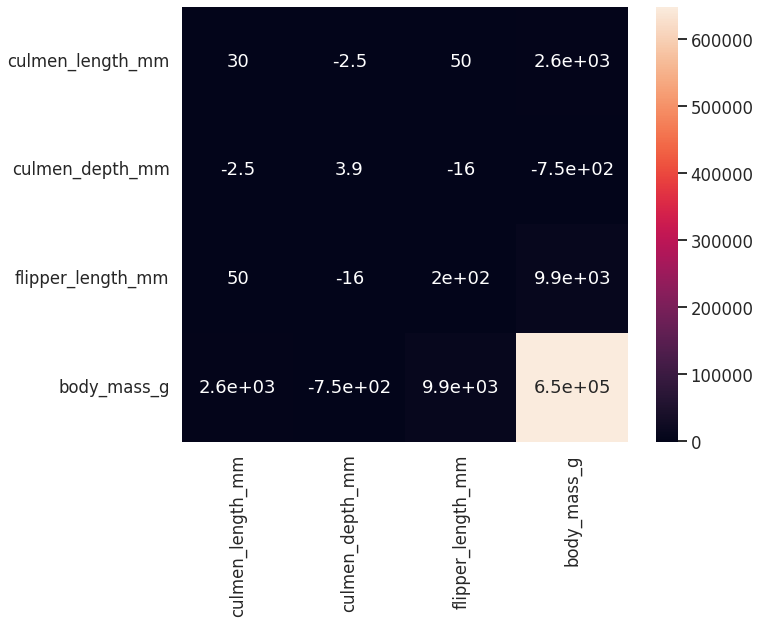

In [21]:
#applying a Seaborn HeatMap to the covariance matrix
plt.figure(figsize=(10,8))
sns.heatmap(cov_no_nan, annot=True);

These results show that the feature with the highest variance is `body_mass_g` (648,372), follow by `flipper_length_mm` (196.44), `culemn_length_mm` (29.91), and `culmen_depth_mm` (3.88). 

In addition, the two features with the highest positive covariance (i.e., tend to vary in the same direction) are `body_mass_g` and `flipper_length_mm` (9,852), follow by `body_mass_g` and `culemn_length_mm` (2,595), and `flipper_length_mm` and `culemn_length_mm` (50.05).

In [22]:
#showing the correlation matrix 
corr_no_nan = df_no_nan.corr()
corr_no_nan

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 
The main diagonal shows that each variable always perfectly correlates with itself (e.g., 1.0). If the correlation coefficient is greater than zero, it is a positive relationship. Conversely, if the value is less than zero, it is a negative relationship. A value of zero indicates that there is no relationship between the two variables.

**Sources**: https://en.wikipedia.org/wiki/Correlation

In [23]:
#showing the correlation matrix values with colors
corr_no_nan.style.background_gradient(cmap='coolwarm').set_precision(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.00,-0.23,0.65,0.59
culmen_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


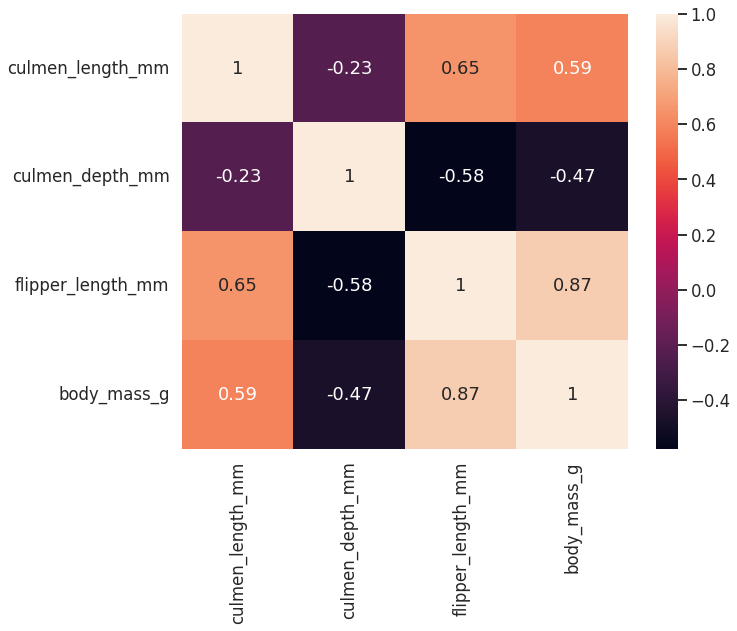

In [24]:
#applying a Seaborn HeatMap to the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_no_nan, annot=True);

These results show that the two features with the highest positive correlation coefficient are `body_mass_g` and `flipper_length_mm` (0.87), follow by `flipper_length_mm` and `culemn_length_mm` (0.65), and `body_mass_g` and `culemn_length_mm` (0.59). 

In [25]:
#defining a list with the continuous (i.e., not discrete) numerical values
con_num_val = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

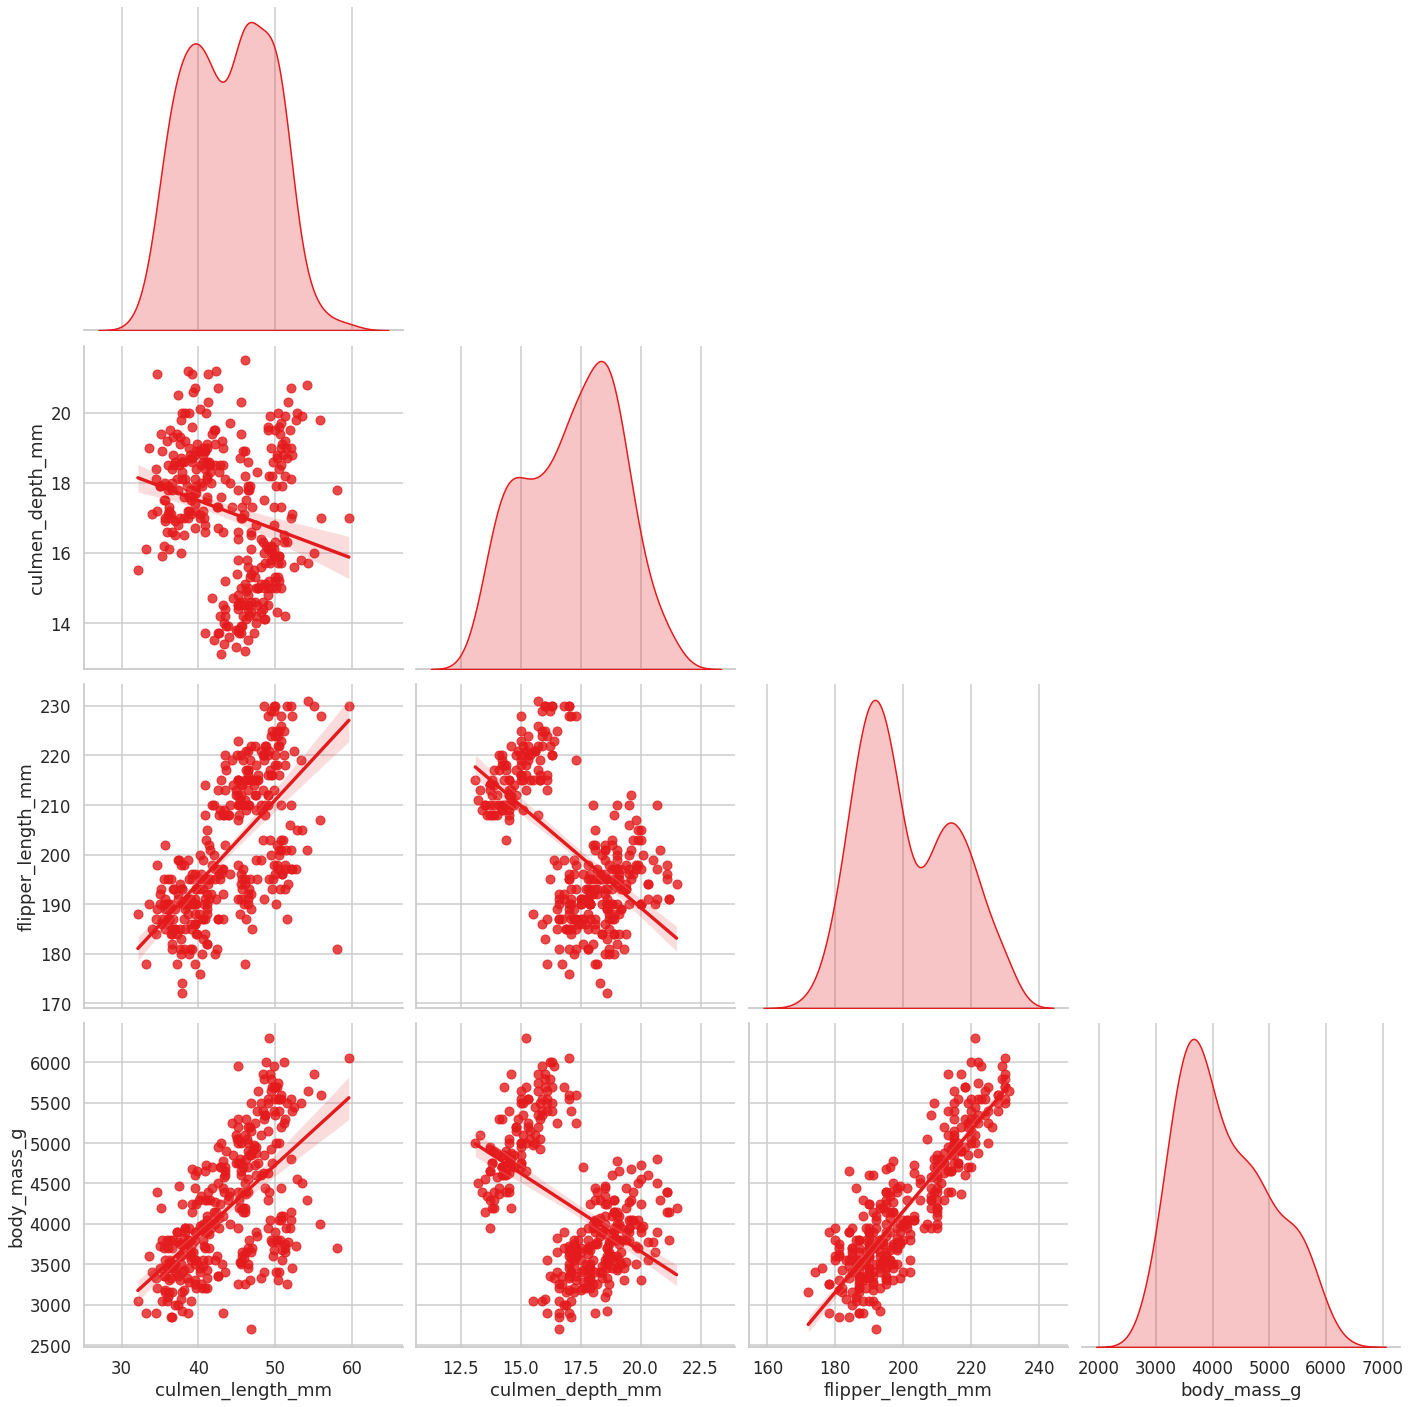

In [26]:
#pairplots for each numeric value with linear regression and kde of the DataFrame from Seaborn
sns.pairplot(df_no_nan[con_num_val], height=5, kind="reg", diag_kind="kde", corner=True);

The pairplot results also show that the two feature with the highest positive correlation coefficient are `body_mass_g` and `flipper_length_mm`. 

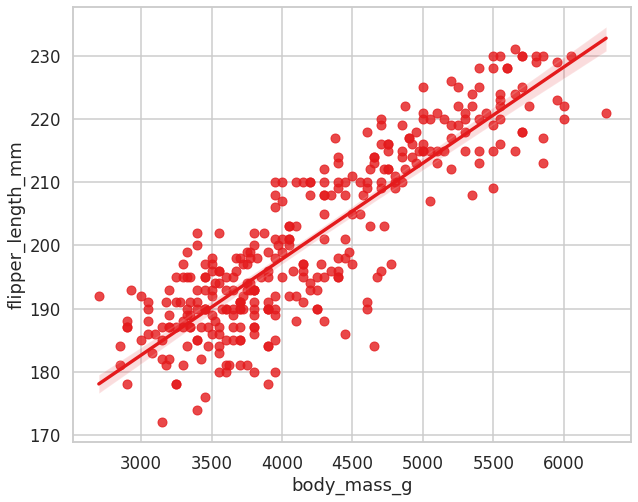

In [27]:
#figure size
plt.figure(figsize=(10,8))
#regplot
sns.regplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm');

#by only adding ; at the end of our code, we get a cleaner output

We can also use a regplot to show the highest positive correlation coefficient between `body_mass_g` and `flipper_length_mm`.

## **Exercise 3:** 
#### Generate boxplot plots for all the numeric `dataframe` elements.

## **Showing Descriptive Statistics of the Clear DataFrame**

In [28]:
#exploring basic statistical details like count, mean, percentiles, max-min, and standard deviation (std) for the grouped categorical features of the continuous values
gb_no_nan = df_no_nan.groupby(['species', 'island', 'sex'])[con_num_val]
gb_no_nan.describe()

culmen_length_mm             ... body_mass_g        
                                      count       mean  ...         75%     max
species   island    sex                                 ...                    
Adelie    Biscoe    FEMALE             22.0  37.359091  ...     3693.75  3900.0
                    MALE               22.0  40.590909  ...     4268.75  4775.0
          Dream     FEMALE             27.0  36.911111  ...     3487.50  3700.0
                    MALE               28.0  40.071429  ...     4300.00  4650.0
          Torgersen FEMALE             24.0  37.554167  ...     3606.25  3800.0
                    MALE               23.0  40.586957  ...     4275.00  4700.0
Chinstrap Dream     FEMALE             34.0  46.573529  ...     3693.75  4150.0
                    MALE               34.0  51.094118  ...     4100.00  4800.0
Gentoo    Biscoe    FEMALE             58.0  45.563793  ...     4875.00  5200.0
                    MALE               61.0  49.473770  ...     5700.00  6300.0

[10 rows x 32 columns]

In [29]:
#exploring variance for the grouped categorical features of the continuous values
gb_no_nan.var()

culmen_length_mm  ...    body_mass_g
species   island    sex                       ...               
Adelie    Biscoe    FEMALE          3.105390  ...  117972.132035
                    MALE            4.026580  ...  126428.571429
          Dream     FEMALE          4.364103  ...   44967.948718
                    MALE            3.056190  ...  109261.739418
          Torgersen FEMALE          4.874764  ...   67155.797101
                    MALE            9.165731  ...  138735.177866
Chinstrap Dream     FEMALE          9.663824  ...   81415.441176
                    MALE            2.447843  ...  131143.605169
Gentoo    Biscoe    FEMALE          4.207613  ...   79286.335451
                    MALE            7.401634  ...   98068.306011

[10 rows x 4 columns]

## **Boxplot of the continuous values of the Clear DataFrame**

In [30]:
#defining a list with the discrete values
dis_val = ['species', 'island', 'sex']

In [31]:
#creating a function to built several boxplots for each numerical features against "species" into a single figure of the Clean DataFrame from Seaborn

#creating and defining funtion parameters
#dataframe: our data
#qualitative: our qualitative variabels   
#features: our targets (i.e., which values we want to plot)
#rows and cols: number of rows and columns with subplots within figure   
def boxplots_plot(dataframe, qualitative, features, rows, cols):
  #defining figure parameters
  fig=plt.figure(figsize=(20,10)) 
  #for loop to implement subplots for each feature
  for i, feature in enumerate(features):
    #adding subplots to figure
    ax=fig.add_subplot(rows,cols,i+1)                     
    #calling boxplot for each subplot 
    sns.boxplot(x=qualitative, y=dataframe[feature], data=dataframe)
    #adding title to each subplot
    ax.set_title(feature+' boxplot per '+qualitative, fontsize=12, fontweight='bold')
  #adjusting subplot parameters 
  fig.tight_layout()  
  #showing figure
  plt.show() 

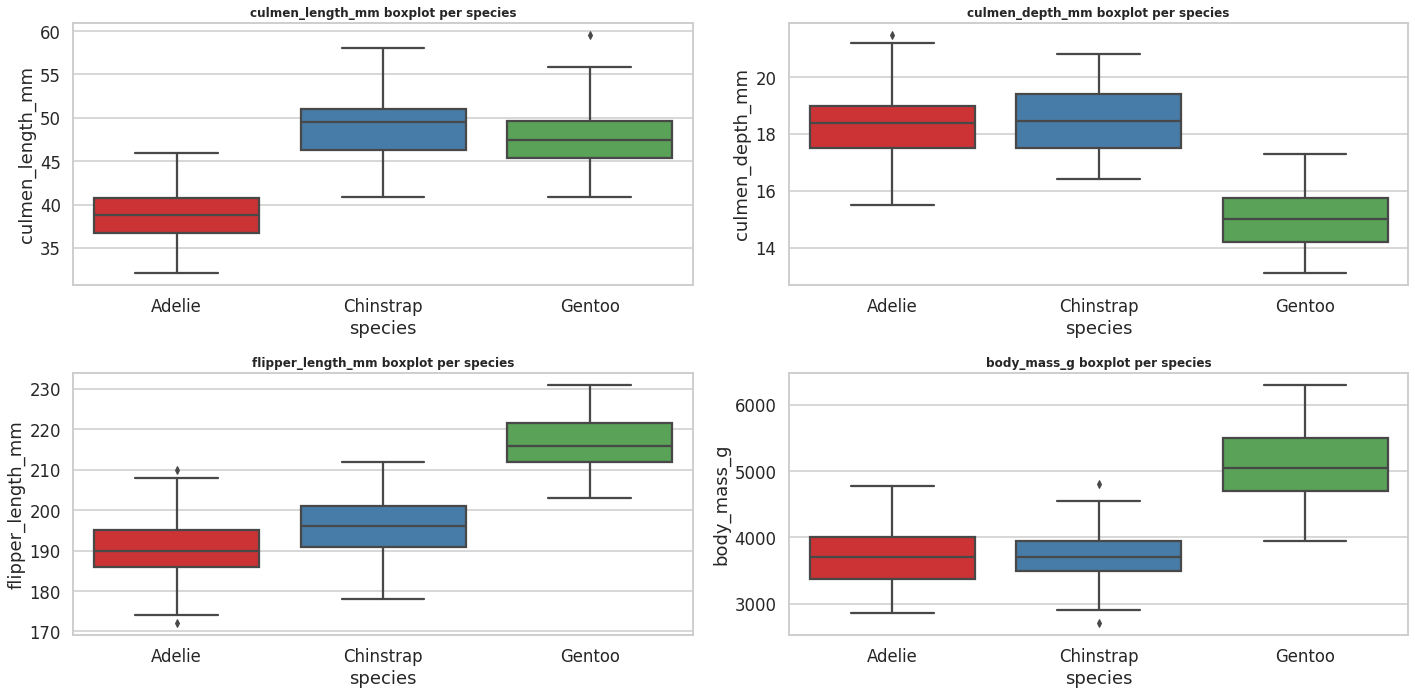

In [32]:
#boxplots for each species from Seaborn
boxplots_plot(df_no_nan,'species',con_num_val,2,2)

These results show that `culemn_length_mm` and `culemn_depth_mm` are relatively smaller in Adélie and Gentoo penguins, respectively. In addition, `body_mass_g` and `flipper_length_mm` are relatively bigger in Gentoo penguins than in the other species. The variation of the IQR (interquartile range) among the features per species are relative similar, with the median, in most cases, coinciding with the center of the box. 

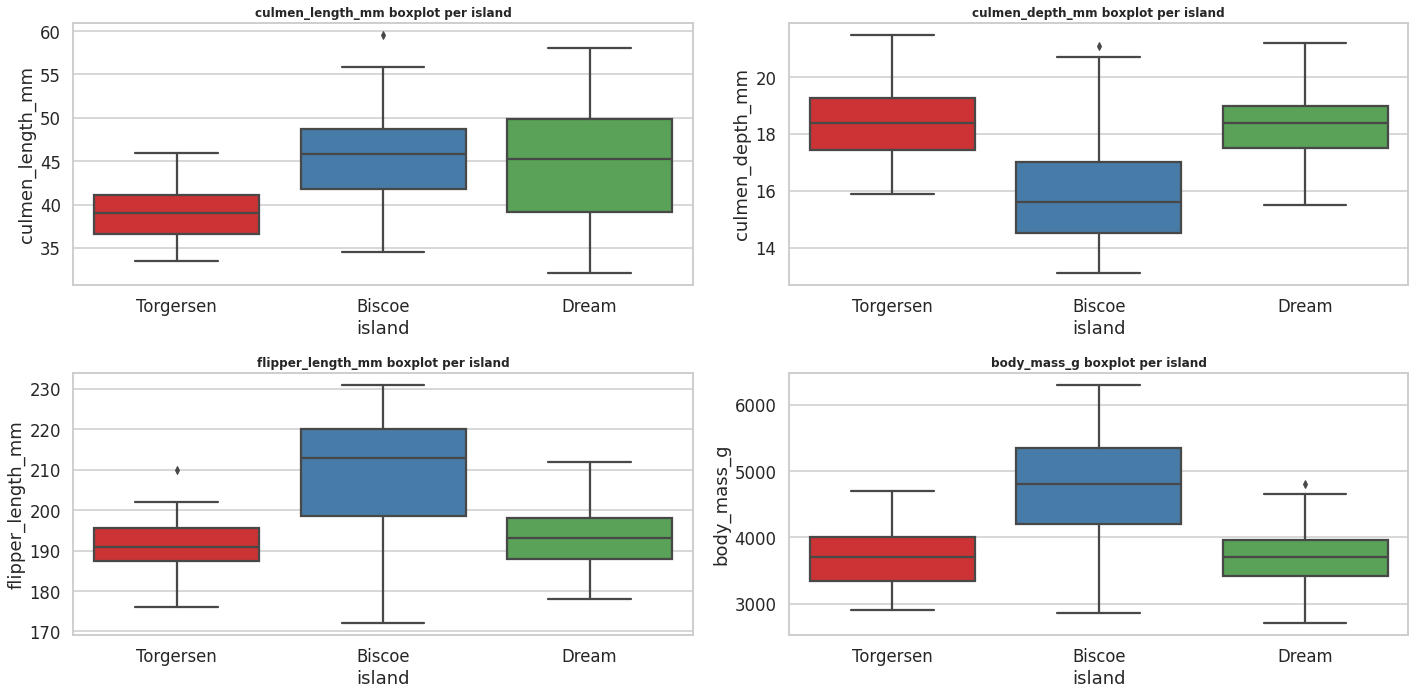

In [33]:
#boxplots for each island from Seaborn
boxplots_plot(df_no_nan,'island',con_num_val,2,2)

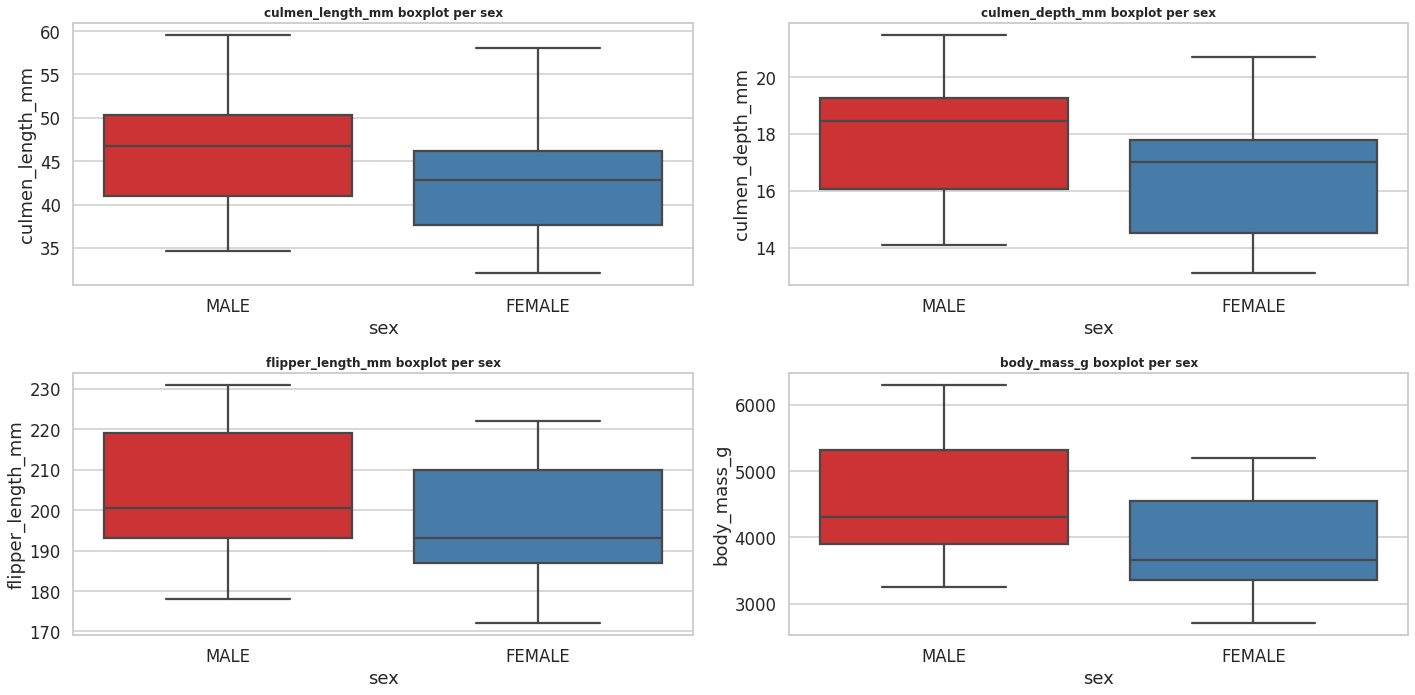

In [34]:
#boxplots for each sex from Seaborn
boxplots_plot(df_no_nan,'sex',con_num_val,2,2)

## **Pairplot of the continuous values of the Clear DataFrame**

In [35]:
#defining a list with the continuous (i.e., not discrete) numerical values including species
con_num_val_sp = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']

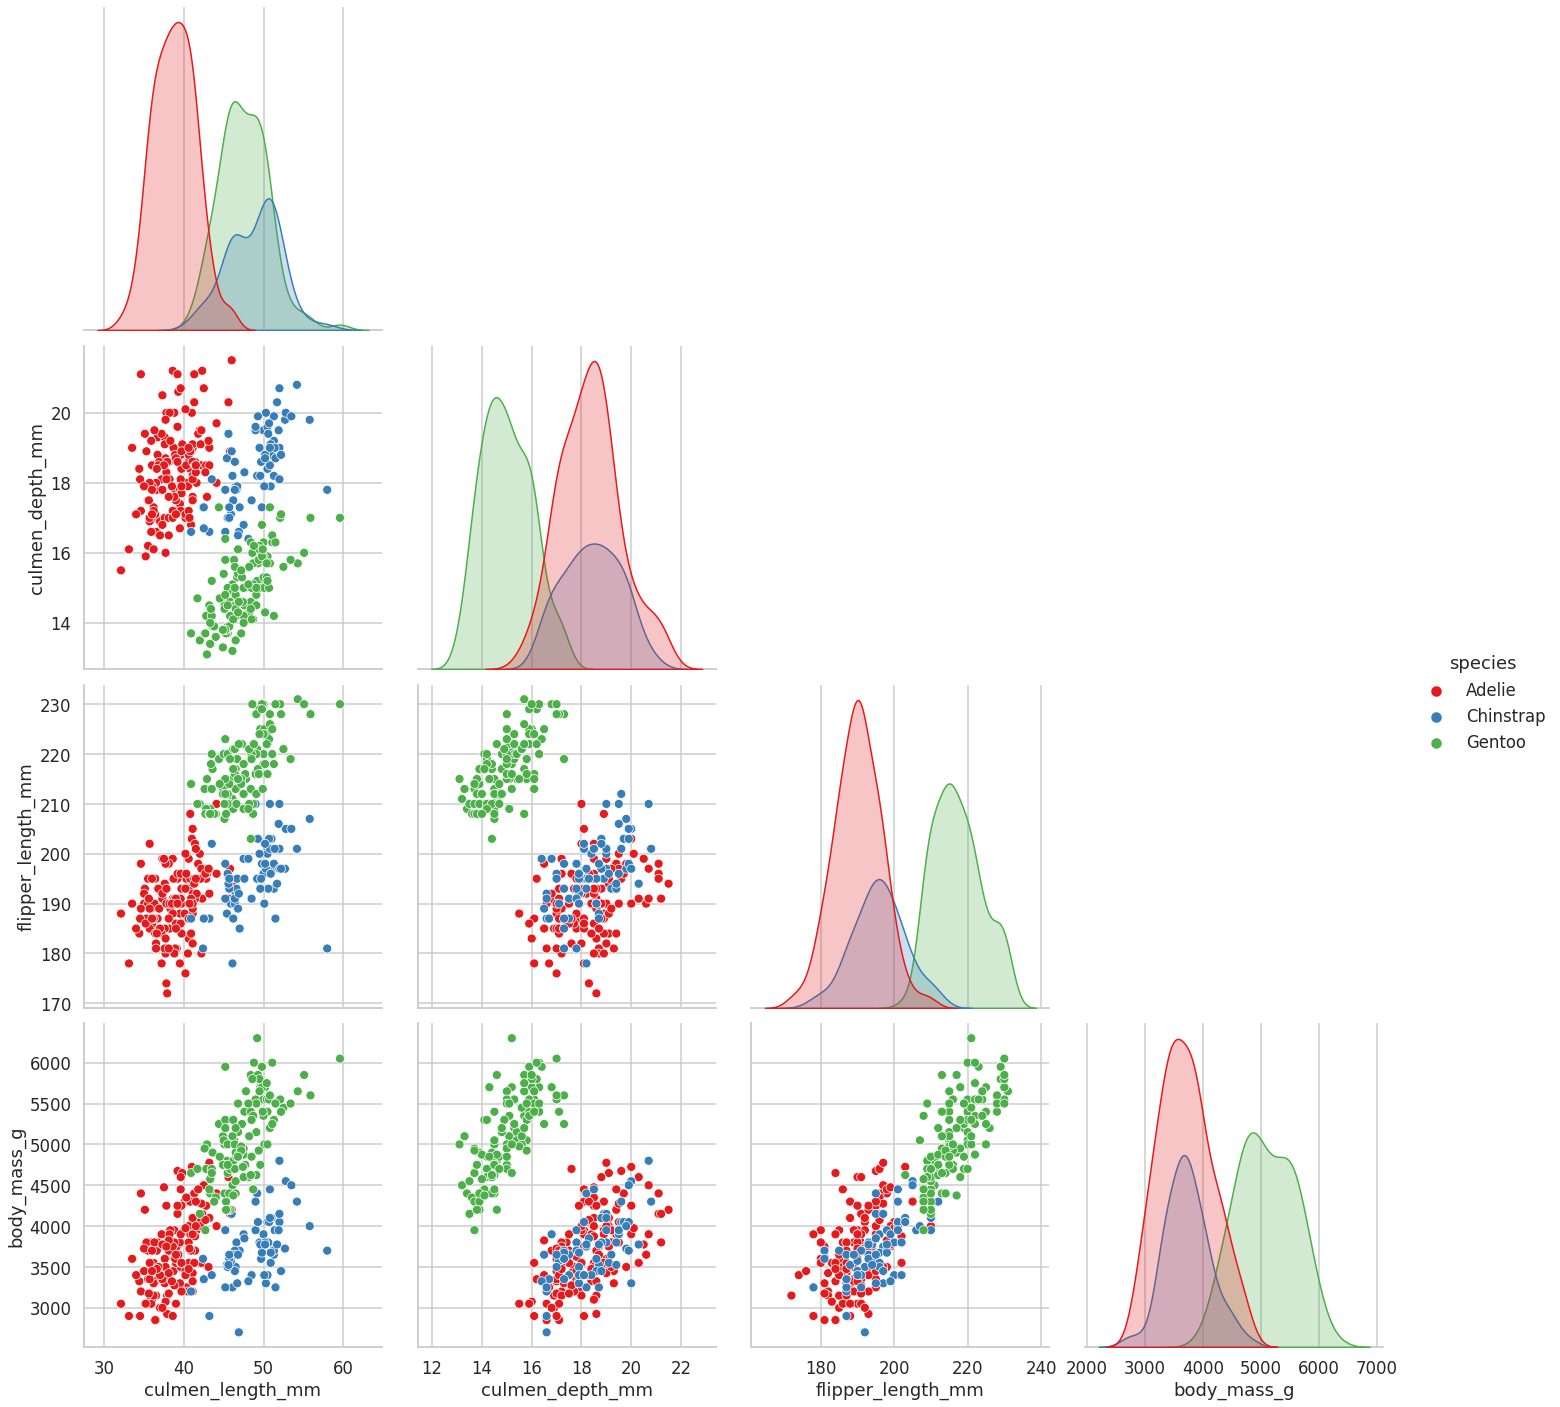

In [36]:
#pairplots for each numeric value per species with kde of the DataFrame from Seaborn
sns.pairplot(df_no_nan[con_num_val_sp], height=5, hue="species", diag_kind="kde", corner=True);

These results illustrate the distribution of the `dataframe`continues values among the species. 

## **Exercise 4:** 
#### Plot a scatter plot between the `body_mass_g` and `flipper_length_mm` features, and observe the penguins population sex and locality distributions. Discuss.

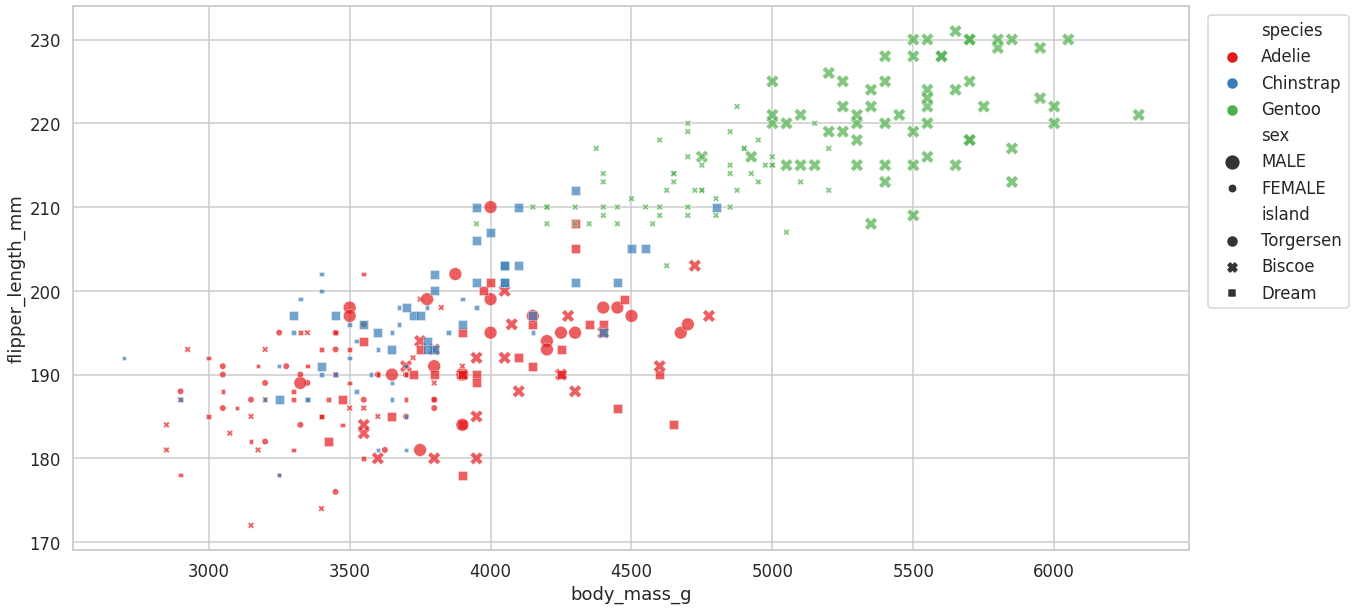

In [37]:
#figure size
plt.figure(figsize=(20,10))
#scatterplot
sns.scatterplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm', alpha=0.7, hue='species', size='sex', style='island')
#moving the legend outside the chart
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

#by only adding ; at the end of our code, we get a cleaner output

The Gentoo penguins present the biggest `body_mass_g` and the longest `flipper_length_mm` of all penguins in the dataset, with their male specimens being the extreme (i.e., upper-right corner). These results are similar to those shown by the *species* boxplot (see above). Despite living in all the islands, the Adélie penguins `body_mass_g` and `flipper_length_mm` relation is relatively stable across the populations. As in the previous species, Adélie male specimens have bigger `body_mass_g` and longer `flipper_length_mm` than female specimens. The distribution of those features in Chinstrap penguins is similar to that in Adélie penguins, as previously shown in the *species* boxplot (see above). However, these species can be distinguished by the `culemn_length_mm` (see *species* boxplots above).

## **Predicting Missing Values Visually**

We can use the Scatterplot in a way to predict the missing values on the *sex* category for the nine specimens. We will plot the dataframe with the missing data (`df_only_nan`) above the dataframe without it (`df_no_nan`), and try to predict in which category of *sex* those specimens belong.

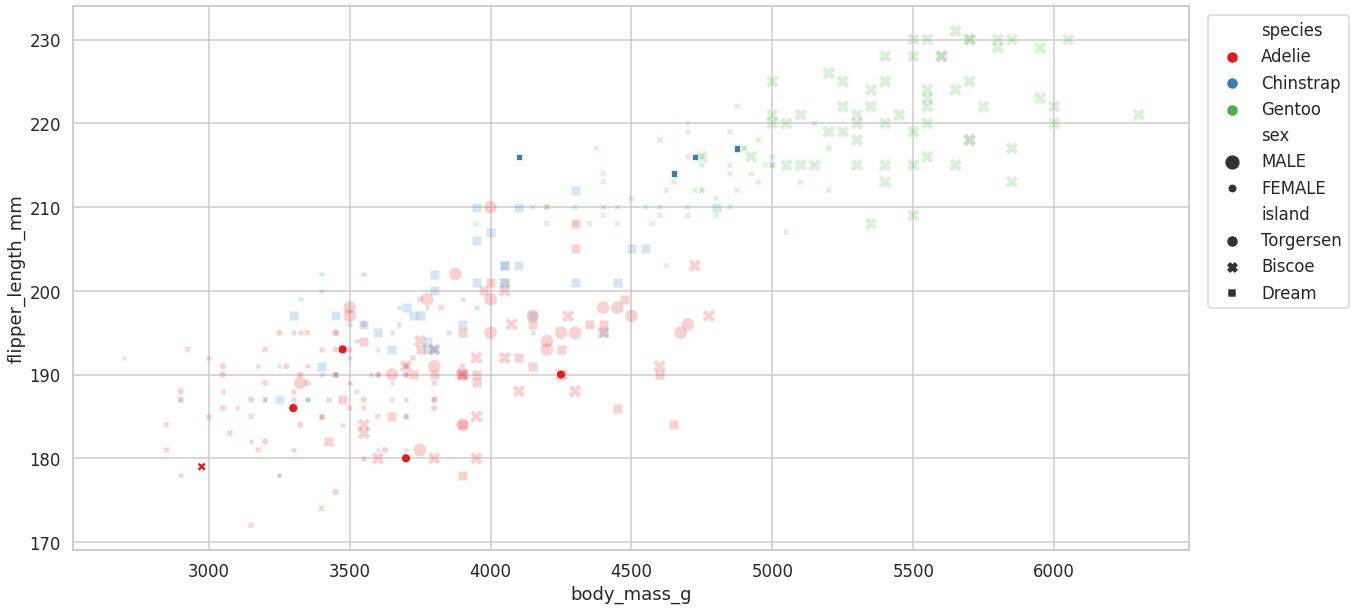

In [38]:
#plotting specimens with 'sex' missing values for prediction
#figure size
plt.figure(figsize=(20,10))
#scatterplot DataFrame without NaN
sns.scatterplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm', alpha=0.2, hue='species', size='sex', style='island')
#scatterplot DataFrame with NaN
sns.scatterplot(data=df_only_nan, x='body_mass_g', y='flipper_length_mm', hue='species', style='island', legend=False)
#moving the legend outside the chart
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

Probably, the Chinstrap penguin specimens (i.e., blue square) are males, as females present a `flipper_length_mm` value of 202 and a `body_mass_g` value of 4,150 top (see above in `gb_no_nan.describe()`). The far-right Adélie penguin specimen from Torgersen (i.e., red circle) also seems to be a male. However, the other Adélie penguin specimens from Torgersen are difficult to predict, as the distribution of both features for both sexes overlapped. In addition, probably, the Adélie penguin specimen from Biscoe (i.e., red cross) is a female, as males present, at least, a `flipper_length_mm` value of 180 and a `body_mass_g` value of 3,550.

## **Exercise 5:** 
#### Propose a simple linear regression model for the `flipper_length_mm` and `body_mass_g` features. Print the regression coefficients.

## **Generating Linear Regression Model**

In [39]:
#creating X and y variabels
X = df_no_nan[['body_mass_g']]
y = df_no_nan['flipper_length_mm']

In [40]:
#importing Linear Regression from ScikitLearn library
from sklearn.linear_model import LinearRegression
#calling the Linear Regression
linreg = LinearRegression()
#fitting the variables
linreg.fit(X, y)

LinearRegression()

**Sources**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [41]:
#printing coefficients
print('Beta_0: ')
print(linreg.intercept_)

print('\nBeta_1: ')
print(linreg.coef_)

Beta_0: 
137.03962089225467

Beta_1: 
[0.01519526]


Beta 0 (a.k.a., *b0*) and Beta 1 (a.k.a., *b1*) are known as the regression beta coefficients or parameters: *b0* is the **intercept** of the regression line, that is the predicted value when x = 0, whereas *b1* is the slope of the regression line.

We can use the Linnear Regression Model to predict the values of `flipper_length_mm` using the `body_mass_g` values from another dataset, for example, those of the `df_only_nan` DataFrame. Note that this Dataframe has both values. However, it is important to use an external dataset that was not used to train the model. 

In [42]:
#predicting specimens 'flipper_length_mm' using  specimens 'body_mass_g' from df_only_nan
predict_flipper_length = linreg.predict(df_only_nan[['body_mass_g']])
predict_flipper_length

array([189.84316613, 201.61949636, 187.18399478, 193.26210071,
       182.24553372, 199.34020663, 207.69760228, 208.83724714,
       211.11653687])

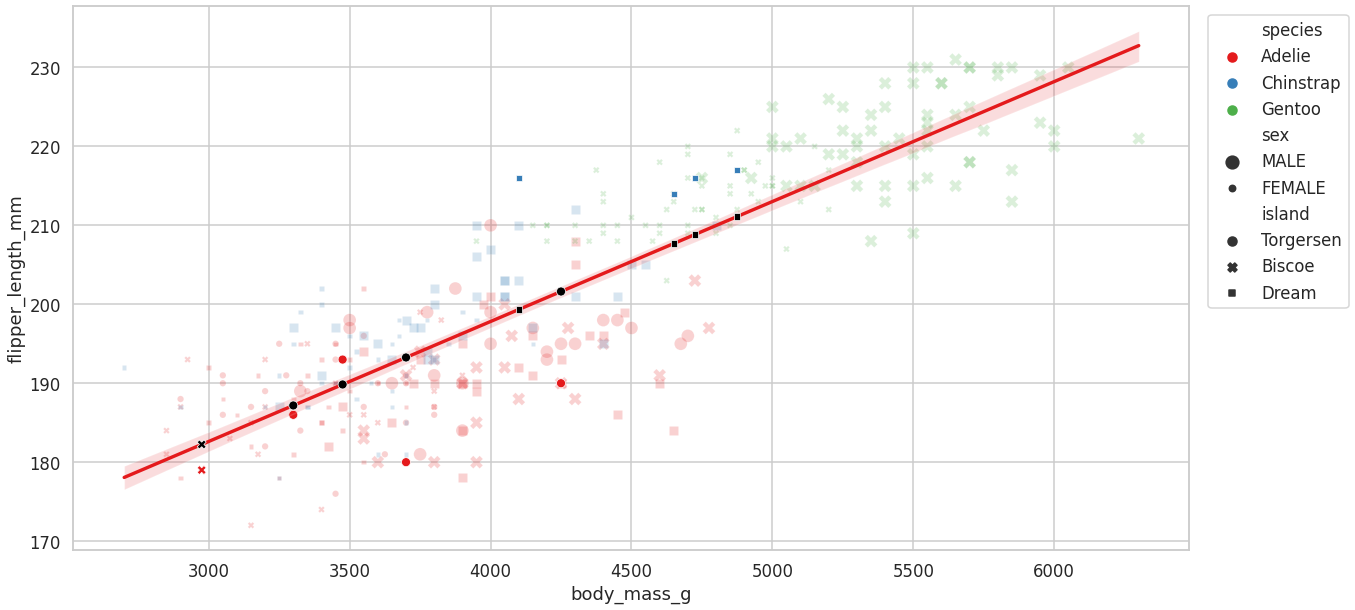

In [43]:
#plotting specimens 'flipper_length_mm' using  specimens 'body_mass_g' from df_only_nan
#figure size
plt.figure(figsize=(20,10))
#scatterplot DataFrame without NaN
sns.scatterplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm', alpha=0.2, hue='species', size='sex', style='island')
#scatterplot DataFrame with NaN
sns.scatterplot(data=df_only_nan, x='body_mass_g', y='flipper_length_mm', hue='species', style='island', legend=False)
#scatterplot DataFrame with NaN
sns.scatterplot(data=df_only_nan, x='body_mass_g', y=predict_flipper_length, color='black', style='island', legend=False, zorder=10)
#sns.scatterplot(data=df_only_nan, x='body_mass_g', y=predict_flipper_length, hue='species', style='island', palette='dark', legend=False)
sns.regplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm', scatter=False)
#moving the legend outside the chart
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

Black points (e.g., crosses, circles and squares) on the red regression line represent the predicted values `predict_flipper_length`. Strong coloured points represent the actual `flipper_length_mm` values from the `df_only_nan` DataFrame. Note that in some cases the predictions are accurate (e.g., small differences), while in others are not (e.g., huge differences).

## **Exercise 6:** 

#### Consider the following combinations of multiple attributes:

- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex'])
- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
- ['culmen_length_mm', 'culmen_depth_mm'])
- ['culmen_length_mm'])

#### Propose multiple linear regression and compare the following metrics for each combination:

- MAE
- MSE
- RMSE
- R2

#### Discuss the results.

In [44]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

**Sources**:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/model_evaluation.html

In [45]:
#setting features
feature_cols_0 = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex']
feature_cols_1 = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
feature_cols_2 = ['culmen_length_mm', 'culmen_depth_mm']
feature_cols_3 = ['culmen_length_mm']

#other tests
feature_cols_4 = ['culmen_length_mm', 'flipper_length_mm', 'sex']
feature_cols_5 = ['culmen_length_mm', 'flipper_length_mm']
feature_cols_6 = ['flipper_length_mm', 'sex']
feature_cols_7 = ['flipper_length_mm']

In [46]:
#setting dummies on categorical features
sex_dummies = pd.get_dummies(df_no_nan['sex'], drop_first=True)
sex_dummies

,MALE
0,1
1,0
2,0
4,0
5,1
...,...
338,0
340,0
341,1
342,0


In [47]:
#setting a new Dataframe with the dummies
df_no_nan_dummies = df_no_nan.copy()
df_no_nan_dummies['sex'] = sex_dummies['MALE']
df_no_nan_dummies

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [48]:
#defining a function for the list of features 

list_features = [feature_cols_0, feature_cols_1, feature_cols_2, feature_cols_3]

for l_f in list_features:
    X = df_no_nan_dummies[l_f]
    y = df_no_nan_dummies['body_mass_g']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print ('Group of features: ', l_f)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ('--------------------------------------------------------------------------------')

Group of features:  ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex']
MAE: 264.14983679270546
MSE: 104626.22080853466
RMSE: 323.4597669085518
R2: 0.8262221188698928
--------------------------------------------------------------------------------
Group of features:  ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
MAE: 299.16559760016264
MSE: 137358.85353443123
RMSE: 370.61955363206516
R2: 0.7718551780116762
--------------------------------------------------------------------------------
Group of features:  ['culmen_length_mm', 'culmen_depth_mm']
MAE: 509.9204057897284
MSE: 388195.19731096784
RMSE: 623.0531255928083
R2: 0.35523104693770047
--------------------------------------------------------------------------------
Group of features:  ['culmen_length_mm']
MAE: 530.4091675861231
MSE: 438465.29728164594
RMSE: 662.1671218670148
R2: 0.27173542423820884
--------------------------------------------------------------------------------


The Mean Squared Error (MSE), Mean absolute error (MAE), Root Mean Squared Error (RMSE), and R-Squared (R2) or Coefficient of determination metrics are used to evaluate the performance of the model in regression analysis. The **lower value** of MAE, MSE, and RMSE implies **higher accuracy** of a regression model. However, a higher value of R square is considered desirable.

Our results show that the best performance, higher accuracy, model is the one using the combination of the features `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `sex`. In other words, using those features results in the lower values of MAE, MSE, and RMSE, and in the higher value of R2. 

For comparing the accuracy among different linear regression models, RMSE is a better choice than R2. In our case, the lower RMSE is 323.46 followed by 370.62, 623.05, and 662.17. Our dataset `df_no_nan` presents a few outliers (see boxplots above). However, in those cases with many outliers, we should also compare the MAE values as they are more robust to data with outliers.

**Sources**: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

In [49]:
#defining a function for another list of features 

list_features = [feature_cols_4, feature_cols_5, feature_cols_6, feature_cols_7]

for l_f in list_features:
    X = df_no_nan_dummies[l_f]
    y = df_no_nan_dummies['body_mass_g']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print ('Group of features: ', l_f)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ('--------------------------------------------------------------------------------')

Group of features:  ['culmen_length_mm', 'flipper_length_mm', 'sex']
MAE: 266.8883332455188
MSE: 107448.11050628818
RMSE: 327.792785927769
R2: 0.8215351292350872
--------------------------------------------------------------------------------
Group of features:  ['culmen_length_mm', 'flipper_length_mm']
MAE: 300.9611043918509
MSE: 138986.5155129616
RMSE: 372.80895310193614
R2: 0.769151729032642
--------------------------------------------------------------------------------
Group of features:  ['flipper_length_mm', 'sex']
MAE: 269.93961325652054
MSE: 108100.58715937028
RMSE: 328.7865373754988
R2: 0.8204514046258713
--------------------------------------------------------------------------------
Group of features:  ['flipper_length_mm']
MAE: 299.39047755852704
MSE: 138931.09920252106
RMSE: 372.73462302625046
R2: 0.7692437722024514
--------------------------------------------------------------------------------


Comparing other combinations of features, we arrived at the same conclusions as before: the best performance, higher accuracy, model presents the features `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `sex` with an RMSE value of 323.46. However, note that `flipper_length_mm` performs better alone than in combination with `culmen_length_mm` despite both being highly positively correlated with `body_mass_g` (see correlation matrix above). This example shows the importance of testing the higher number of combinations of features as possible.


## **My Own Exercice:**

#### Use a Pipeline applying supervised learning on the `df_no_nan` DataFrame to select the best model to predict the `sex` values on the `df_only_nan` DataFrame.

In [125]:
#for building train and test datasets
from sklearn.model_selection import train_test_split
#for setting pipeline
from sklearn.pipeline import Pipeline

In [126]:
#dividing X and y 
X_no_nan = df_no_nan.drop('sex', axis= 1)
y_no_nan = df_no_nan['sex']
X_train, X_test, y_train, y_test = train_test_split(X_no_nan, y_no_nan, test_size=0.20, random_state=43)

In [127]:
#scalating the numeric features
from sklearn.preprocessing import StandardScaler
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])

In [128]:
#encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [129]:
#for applying transformations on the numeric features
numeric_features = X_train.select_dtypes(include=['float64']).columns

In [130]:
#for applying transformations on the categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

In [131]:
#applying transforamtions for future pipeline
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

In [132]:
#for testing different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [133]:
#initiating classifiers
SEED=43
lr= LogisticRegression(random_state=SEED, solver='liblinear')
dt= DecisionTreeClassifier(random_state=SEED)
knn= KNN()
gaussian_nb= GaussianNB()
randomforest= RandomForestClassifier(random_state=SEED)

In [134]:
#setting classifiers
classifiers = [('Logistic Regression', lr),('Classification Tree', dt),('K Nearest Neighbours', knn),('Guassian Naive Bayes', gaussian_nb),('Random Forest', randomforest)]

In [135]:
#building pipeline for testing the classifiers using previous pipeline parameters and cross-validating their results
from sklearn.model_selection import cross_val_score

for clf_name, clf in classifiers:
    #applying preprocessor to classifiers
    pipe= Pipeline(steps=[('preprocessor', preprocessor),('classifier', clf)])
    #fitting the classifiers 
    pipe.fit(X_train,y_train)   
    #predicting the 'sex' values
    y_pred= pipe.predict(X_test) 
    #cross-validating the models
    cv_scores= cross_val_score(pipe,X_no_nan,y_no_nan,cv=5).mean()
    #checking classifiers accuracy
    score= pipe.score(X_test, y_test)
    #printing the results
    print('{:s} : {:.3f}'.format(clf_name, score))

Logistic Regression : 0.910
Classification Tree : 0.851
K Nearest Neighbours : 0.881
Guassian Naive Bayes : 0.746
Random Forest : 0.866


Testing for both numerical and categorical features of the `df_no_nan` DataFrame, the Logistic Regression model obtained the best cross validation score of 0.910, followed by the K Nearest Neighbours with a value of 0.881.

### **Logistic Regression Model**


In [137]:
#predicting the test dataset using the Logistic Regression Model
pipe_lr= Pipeline(steps=[('preprocessor', preprocessor),('Logistic Regression', lr)])
pipe_lr.fit(X_train,y_train) 
y_pred= pipe_lr.predict(X_test)

In [138]:
y_pred

array(['MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'MALE', 'FEMALE'], dtype=object)

Now, let's see how the Logistic Regression Model predicts the `sex` values for the `df_only_nan` DataFrame. 

In [139]:
#calling the DataFrame
df_only_nan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [140]:
#droping the feature 'sex' with NaN values
X_only_nan = df_only_nan.drop('sex', axis= 1)
X_only_nan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0
47,Adelie,Dream,37.5,18.9,179.0,2975.0
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0


In [141]:
#predicting the dataset using the Logistic Regression Model
y_pred_only_nan= pipe_lr.predict(X_only_nan)
y_pred_only_nan

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE'], dtype=object)

We can visualize those predictions on a Scatter Plot. For that, we will need to convert the prediction outputs from the array into a DataFrame. 

In [142]:
#converting the array into a DataFrame with the same Index values from the df_no_nan DataFrame
X_only_nan_sex= pd.DataFrame(y_pred_only_nan, columns=['sex']).set_index(pd.Index([8, 9, 10, 11, 47, 246, 286, 324, 336]))
X_only_nan_sex

,sex
8,FEMALE
9,MALE
10,FEMALE
11,FEMALE
47,FEMALE
246,FEMALE
286,FEMALE
324,FEMALE
336,FEMALE


In [143]:
#creating a new Dataframe with the sex values from the prediction array
X_only_nan_predict= pd.concat([X_only_nan, X_only_nan_sex], axis=1)
X_only_nan_predict

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,MALE
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,FEMALE
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,FEMALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,FEMALE
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,FEMALE
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,FEMALE
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,FEMALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE


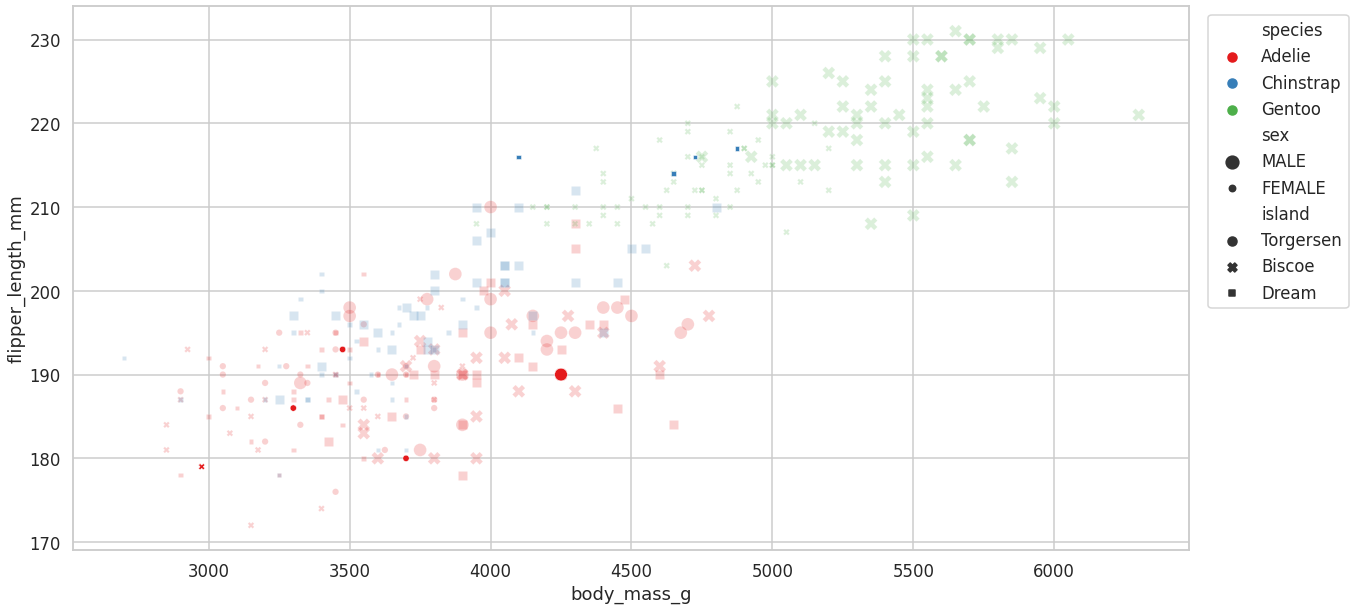

In [145]:
#plotting specimens with the predicted 'sex' values from the Logistic Regression Model
#figure size
plt.figure(figsize=(20,10))
#scatterplot DataFrame without NaN
sns.scatterplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm', alpha=0.2, hue='species', size='sex', size_order= ['MALE', 'FEMALE'], style='island')
#scatterplot DataFrame with predicted values
sns.scatterplot(data=X_only_nan_predict, x='body_mass_g', y='flipper_length_mm', hue='species', size='sex', size_order= ['MALE', 'FEMALE'], style='island', legend=False)
#moving the legend outside the chart
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

Comparing these results with those from Exercise 4, we can conclude that:

1.   the Logistic Regression model predicted our guess that the far-right Adélie penguin specimen from Torgersen (i.e., red circle) was a male, and and that the Adélie penguin specimen from Biscoe (i.e., red cross) was a female; 
2.   the model predicted the other Adélie penguin specimens from Torgersen as females, which were difficult to guess because the distribution of features overlapped between sexes;
3.   however, the model predicted that the Chinstrap penguin specimens (i.e., blue square) are females instade of males, as our guess, despite the metrics compared (see above in `gb_no_nan.describe()`).

Let's try another approach, for example, only using the numerical features of the `df_no_nan` DataFrame to predict the `sex` values of the `df_only_nan` DataFrame.

In [146]:
#applying transforamtions for future pipeline
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

In [147]:
#building pipeline for testing the classifiers using previous pipeline parameters and cross-validating their results
from sklearn.model_selection import cross_val_score

for clf_name, clf in classifiers:
    #applying preprocessor to classifiers
    pipe= Pipeline(steps=[('preprocessor', preprocessor),('classifier', clf)])
    #fitting the classifiers 
    pipe.fit(X_train,y_train)   
    #predicting the 'sex' values
    y_pred= pipe.predict(X_test) 
    #cross-validating the models
    cv_scores= cross_val_score(pipe,X_no_nan,y_no_nan,cv=5).mean()
    #checking classifiers accuracy
    score= pipe.score(X_test, y_test)
    #printing the results
    print('{:s} : {:.3f}'.format(clf_name, score))

Logistic Regression : 0.866
Classification Tree : 0.851
K Nearest Neighbours : 0.896
Guassian Naive Bayes : 0.746
Random Forest : 0.881


In this case, testing for the numerical features, the K Nearest Neighbours model obtained the best cross validation score of 0.896, followed by the Random Forest with a value of 0.881.

### **K Nearest Neighbours Model**

In [159]:
#predicting the test dataset using the K Nearest Neighbours Model
pipe_knn= Pipeline(steps=[('preprocessor', preprocessor),('K Nearest Neighbours', knn)])
pipe_knn.fit(X_train,y_train) 
y_pred_knn= pipe_knn.predict(X_test)

In [160]:
y_pred_knn

array(['MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'MALE', 'FEMALE'], dtype=object)

In [161]:
#predicting the dataset using the K Nearest Neighbours Model
y_pred_only_nan_knn= pipe_knn.predict(X_only_nan)
y_pred_only_nan_knn

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE'], dtype=object)

In [162]:
#converting the array into a DataFrame with the same Index values from the df_no_nan DataFrame
X_only_nan_sex_knn= pd.DataFrame(y_pred_only_nan_knn, columns=['sex']).set_index(pd.Index([8, 9, 10, 11, 47, 246, 286, 324, 336]))
X_only_nan_sex_knn

,sex
8,FEMALE
9,MALE
10,FEMALE
11,FEMALE
47,FEMALE
246,FEMALE
286,FEMALE
324,FEMALE
336,MALE


In [163]:
#creating a new Dataframe with the sex values from the prediction array
X_only_nan_predict_knn= pd.concat([X_only_nan, X_only_nan_sex_knn], axis=1)
X_only_nan_predict_knn

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,MALE
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,FEMALE
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,FEMALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,FEMALE
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,FEMALE
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,FEMALE
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,FEMALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,MALE


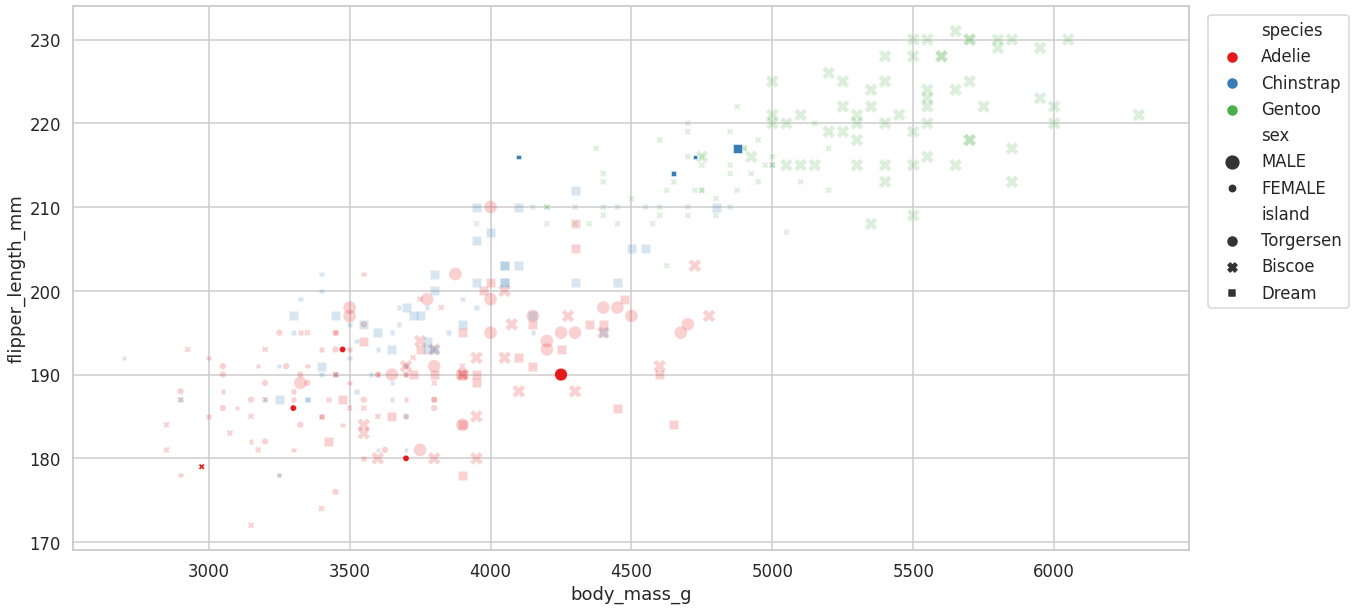

In [164]:
#plotting specimens with 'sex' missing values for prediction
#figure size
plt.figure(figsize=(20,10))
#scatterplot DataFrame without NaN
sns.scatterplot(data=df_no_nan, x='body_mass_g', y='flipper_length_mm', alpha=0.2, hue='species', size='sex', size_order= ['MALE', 'FEMALE'], style='island')
#scatterplot DataFrame with NaN
sns.scatterplot(data=X_only_nan_predict_knn, x='body_mass_g', y='flipper_length_mm', hue='species', size='sex', size_order= ['MALE', 'FEMALE'], style='island', legend=False)
#moving the legend outside the chart
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

Using the numerical features of the `df_no_nan` DataFrame and a K Nearest Neighbours Model to predict the `sex` values of the `df_only_nan` DataFrame, we obtained most of the predictions as with the previous settings. However, the far-right Chinstrap penguin specimens (i.e., blue square) was predicted as a male, as our previous expectations. 